In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & ML
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv("PRE_DEPARTURE_STUDENTS_MENTAL_HEALTH_SURVEY_EXTENDED.csv")
df.head()


,Timestamp,1. Age Group,2. Gender,3. Academic Level,Destination Country,5. How often do you feel overwhelmed by your responsibilities during pre departure preparation?,6. How often do you feel nervous or on edge about going abroad?,7. Do you find it difficult to relax when thinking about your upcoming move?,8. How often do you worry about your ability to cope with challenges abroad?,9. How often do you feel low energy or lack motivation due to pre_departure stress?,...,21. How comfortable are you discussing your worries with friends or family?,22. How concerned are you about becoming socially isolated abroad?,23. How confident are you about making new friends abroad?,24. Do you get sufficient sleep (7_8_ hours) during the preparation period?,25. How often do you engage in physical activity or exercise?,"26. Do you use relaxation techniques (prayer, meditation, deep breathing)?","27. How prepared do you feel to live independently abroad (cooking, budgeting, managing tasks)?","28. How confident are you about handling unexpected issues abroad (illness, document problems, emergencies)?",29. How strongly do you believe you can manage homesickness after moving abroad?,30. How stressed are you about leaving your family and friends?
0,2025/12/08 11:05:08 PM GMT+6,23–26,Male,Undergraduate,USA,3.0,3.0,No,4.0,5.0,...,2.0,3.0,2.0,No,1.0,No,3.0,2.0,3.0,4.0
1,2025/12/08 11:38:12 PM GMT+6,23–27,Male,Undergraduate,Cypras,3.0,3.0,Yes,2.0,3.0,...,3.0,3.0,2.0,No,2.0,No,2.0,3.0,3.0,2.0
2,2025/12/08 11:41:23 PM GMT+6,23–28,Male,Undergraduate,Australia,3.0,3.0,Yes,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025/12/08 11:43:46 PM GMT+6,23–29,Male,Undergraduate,Anywhere with a good research program,3.0,1.0,No,1.0,1.0,...,5.0,1.0,5.0,No,4.0,Yes,5.0,5.0,3.0,2.0
4,2025/12/08 11:49:38 PM GMT+6,23–30,Male,Undergraduate,USA,4.0,4.0,Yes,1.0,4.0,...,4.0,3.0,4.0,yes,4.0,Yes,3.0,4.0,4.0,3.0


In [3]:
depression_cols = [
    "5. How often do you feel overwhelmed by your responsibilities during pre departure preparation?",
    "6. How often do you feel nervous or on edge about going abroad?",
    "8. How often do you worry about your ability to cope with challenges abroad?",
    "9. How often do you feel low energy or lack motivation due to pre_departure stress?",
    "11. How anxious are you about visa delays or possible rejection?",
    "12. How often do you overthink potential problems that might happen abroad?",
    "14. How stressed do you feel about adapting to a new cultural and academic environment?",
    "20. How often do you feel pressured by your family expectations?",
    "22. How concerned are you about becoming socially isolated abroad?",
    "24. Do you get sufficient sleep (7_8_ hours) during the preparation period?",
    "30. How stressed are you about leaving your family and friends?"
]


In [5]:
# Convert selected columns to numeric (coerce errors to NaN)
for col in depression_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [18]:
df.head()

,Timestamp,1. Age Group,2. Gender,3. Academic Level,Destination Country,5. How often do you feel overwhelmed by your responsibilities during pre departure preparation?,6. How often do you feel nervous or on edge about going abroad?,7. Do you find it difficult to relax when thinking about your upcoming move?,8. How often do you worry about your ability to cope with challenges abroad?,9. How often do you feel low energy or lack motivation due to pre_departure stress?,...,23. How confident are you about making new friends abroad?,24. Do you get sufficient sleep (7_8_ hours) during the preparation period?,25. How often do you engage in physical activity or exercise?,"26. Do you use relaxation techniques (prayer, meditation, deep breathing)?","27. How prepared do you feel to live independently abroad (cooking, budgeting, managing tasks)?","28. How confident are you about handling unexpected issues abroad (illness, document problems, emergencies)?",29. How strongly do you believe you can manage homesickness after moving abroad?,30. How stressed are you about leaving your family and friends?,Depression_Score,Depression_Level
0,2025/12/08 11:05:08 PM GMT+6,23–26,Male,Undergraduate,USA,3.0,3.0,No,4.0,5.0,...,2.0,0.0,1.0,No,3.0,2.0,3.0,4.0,39.0,Severe
1,2025/12/08 11:38:12 PM GMT+6,23–27,Male,Undergraduate,Cypras,3.0,3.0,Yes,2.0,3.0,...,2.0,0.0,2.0,No,2.0,3.0,3.0,2.0,26.0,Severe
2,2025/12/08 11:41:23 PM GMT+6,23–28,Male,Undergraduate,Australia,3.0,3.0,Yes,3.0,4.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,25.0,Severe
3,2025/12/08 11:43:46 PM GMT+6,23–29,Male,Undergraduate,Anywhere with a good research program,3.0,1.0,No,1.0,1.0,...,5.0,0.0,4.0,Yes,5.0,5.0,3.0,2.0,18.0,Severe
4,2025/12/08 11:49:38 PM GMT+6,23–30,Male,Undergraduate,USA,4.0,4.0,Yes,1.0,4.0,...,4.0,0.0,4.0,Yes,3.0,4.0,4.0,3.0,36.0,Severe


In [6]:
df[depression_cols] = df[depression_cols].fillna(0)  # বা df[depression_cols].median()


In [7]:
df["Depression_Score"] = df[depression_cols].sum(axis=1)


In [17]:
df.head()

,Timestamp,1. Age Group,2. Gender,3. Academic Level,Destination Country,5. How often do you feel overwhelmed by your responsibilities during pre departure preparation?,6. How often do you feel nervous or on edge about going abroad?,7. Do you find it difficult to relax when thinking about your upcoming move?,8. How often do you worry about your ability to cope with challenges abroad?,9. How often do you feel low energy or lack motivation due to pre_departure stress?,...,23. How confident are you about making new friends abroad?,24. Do you get sufficient sleep (7_8_ hours) during the preparation period?,25. How often do you engage in physical activity or exercise?,"26. Do you use relaxation techniques (prayer, meditation, deep breathing)?","27. How prepared do you feel to live independently abroad (cooking, budgeting, managing tasks)?","28. How confident are you about handling unexpected issues abroad (illness, document problems, emergencies)?",29. How strongly do you believe you can manage homesickness after moving abroad?,30. How stressed are you about leaving your family and friends?,Depression_Score,Depression_Level
0,2025/12/08 11:05:08 PM GMT+6,23–26,Male,Undergraduate,USA,3.0,3.0,No,4.0,5.0,...,2.0,0.0,1.0,No,3.0,2.0,3.0,4.0,39.0,Severe
1,2025/12/08 11:38:12 PM GMT+6,23–27,Male,Undergraduate,Cypras,3.0,3.0,Yes,2.0,3.0,...,2.0,0.0,2.0,No,2.0,3.0,3.0,2.0,26.0,Severe
2,2025/12/08 11:41:23 PM GMT+6,23–28,Male,Undergraduate,Australia,3.0,3.0,Yes,3.0,4.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,25.0,Severe
3,2025/12/08 11:43:46 PM GMT+6,23–29,Male,Undergraduate,Anywhere with a good research program,3.0,1.0,No,1.0,1.0,...,5.0,0.0,4.0,Yes,5.0,5.0,3.0,2.0,18.0,Severe
4,2025/12/08 11:49:38 PM GMT+6,23–30,Male,Undergraduate,USA,4.0,4.0,Yes,1.0,4.0,...,4.0,0.0,4.0,Yes,3.0,4.0,4.0,3.0,36.0,Severe


In [8]:
def depression_level(score):
    if score <= 2.0:
        return "No/Minimal"
    elif score <= 3.0:
        return "Mild"
    elif score <= 4.0:
        return "Moderate"
    else:
        return "Severe"

df["Depression_Level"] = df["Depression_Score"].apply(depression_level)

# Check
df["Depression_Level"].value_counts()



Depression_Level
Severe        299
No/Minimal      3
Name: count, dtype: int64

In [9]:
X = df[depression_cols]   # only numeric features
y = df["Depression_Level"]  # target


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


In [12]:
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))


Naive Bayes Accuracy: 1.0


In [13]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

  No/Minimal       1.00      1.00      1.00         1
      Severe       1.00      1.00      1.00        60

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



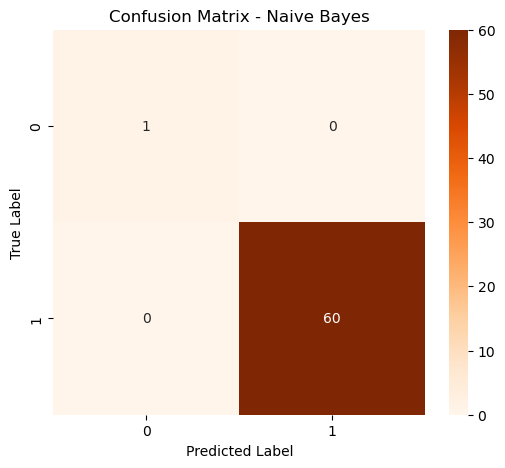

In [14]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [15]:
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid = GridSearchCV(
    GaussianNB(),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

Best Naive Bayes Accuracy: 1.0
              precision    recall  f1-score   support

  No/Minimal       1.00      1.00      1.00         1
      Severe       1.00      1.00      1.00        60

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



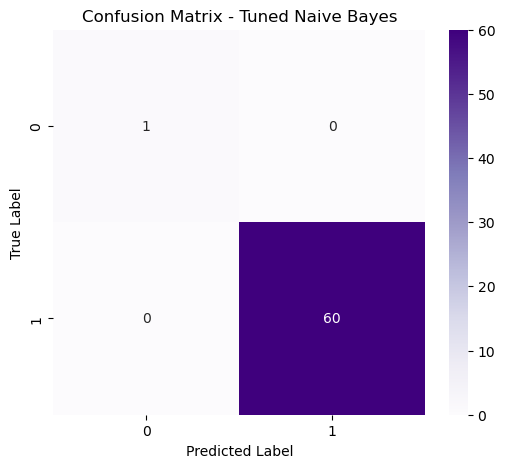

In [16]:
best_nb = grid.best_estimator_

y_pred_best = best_nb.predict(X_test)

print("Best Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,5))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Tuned Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
